## Pytorch Basic Tutorial




### Pytorch & Numpy

- Popular Deep Learning Library
- Numpy의 기능 대부분을 Pytorch에서 사용가능
- Neural Network 학습에 필요한 전반적인 기능을 제공


|                    | Pytorch | Numpy       |
|--------------------|---------|-------------|
| Type Name          | Tensor  | Numpy Array |
| Training Framework | O       | X           |
| GPU Available      | O       | X           |

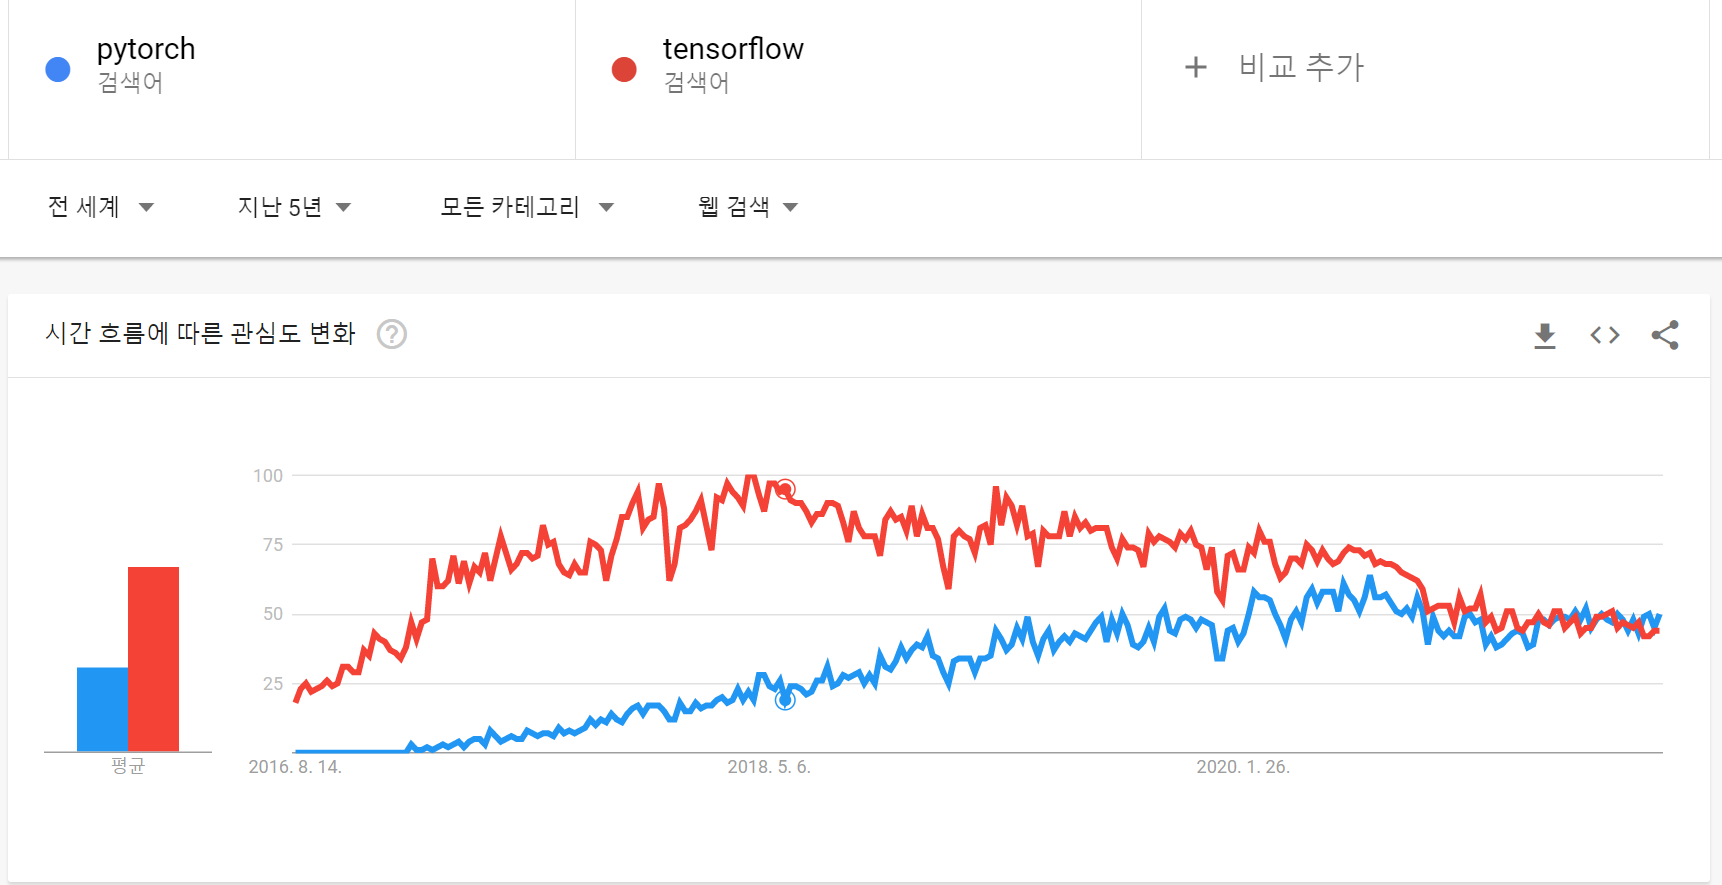

In [1]:
import torch # not pytorch
import numpy as np

In [2]:
ls = [1., 2., 3.]
x_torch = torch.tensor(ls)
x_np = np.array(ls)
print("Pytorch");print(x_torch);print(type(x_torch))
print("Numpy");print(x_np);print(type(x_np))

Pytorch
tensor([1., 2., 3.])
<class 'torch.Tensor'>
Numpy
[1. 2. 3.]
<class 'numpy.ndarray'>


In [3]:
# zero values
x_torch = torch.zeros(2,3)
x_np = np.zeros((2,3))
print("Pytorch");print(x_torch)
print("Numpy");print(x_np)

Pytorch
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Numpy
[[0. 0. 0.]
 [0. 0. 0.]]


In [4]:
# sample from normal distribution
x_torch = torch.randn(2,3)
x_np = np.random.randn(2,3)
print("Pytorch");print(x_torch)
print("Numpy");print(x_np)

Pytorch
tensor([[-0.0856,  0.6077,  0.1763],
        [ 1.0088,  0.9152,  1.6056]])
Numpy
[[-0.05092169  1.22840303  0.74426184]
 [ 1.28241078 -1.93047416  0.56247821]]


### Pytorch: Dataset Loading
- ImageFolder
- DataLoader
- Torchvision.Transforms

In [5]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
download_root = './dataset'
train_dataset = MNIST(download_root, transform=transformation, train=True, download=True)

# Load from directory
transformation = transforms.Compose([
    transforms.ToTensor()
])

#dataset = ImageFolder('./dataset/')
dataset = ImageFolder('./dataset/', transformation)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for i in dataloader:
    print(i[1])
    print(i[0].shape)
    plt.imshow(i[0][0].permute(1,2,0), cmap='Greys', interpolation='nearest')
    plt.show()
    break;

FileNotFoundError: [Errno 2] No such file or directory: './dataset/'

### Pytorch: Dataset Loading
- torchvision library

tensor([8, 1, 6, 5])
torch.Size([4, 1, 28, 28])


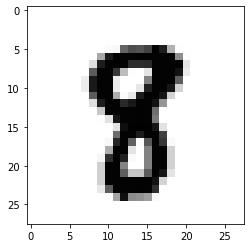

In [10]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load from directory
transformation = transforms.Compose([
    transforms.ToTensor()
])

download_root = './MNIST_DATASET'

train_dataset = MNIST(download_root, transform=transformation, train=True, download=True)

batch_size = 4

dataloader = DataLoader(dataset=train_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

for i in dataloader:
    print(i[1])
    print(i[0].shape)
    plt.imshow(i[0][0][0], cmap='Greys', interpolation='nearest')
    plt.show()
    break;

### Pytorch: Define Model
- nn.module
- init
- forward


In [11]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

    def forward(self, x):
        print('hello world', x)
        
model = Net()
model(-1)
model(2)

hello world -1
hello world 2


In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(120, 84)    

    def forward(self, x):
        print('hello world', x)
        
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=120, out_features=84, bias=True)
)


In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(120, 84)    
        self.fc2 = nn.Linear(120, 84)    

    def forward(self, x):
        print('hello world', x)
        
model = Net()
print(model)


Net(
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
)


In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)      
        self.fc2 = nn.Linear(10, 2)                        
    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x
    
model = Net()
print(model)
x = torch.randn(16, 2)
y = model(x)
print(y.shape)

Net(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)
torch.Size([16, 2])


### Pytorch: backward()
- Optimizer
    - step()
    - zero_grad()

In [15]:
torch.random.manual_seed(1)

w = torch.randn(2, 3).requires_grad_()
x = torch.randn(3)
b = torch.randn(2).requires_grad_()
y = torch.randn(2)

loss = (w.matmul(x).add(b).sub(y) ** 2).mean()

print("## Before backward ##")
print(w.grad)

loss.backward()

print("## After backward ##")
print(w.grad)


## Before backward ##
None
## After backward ##
tensor([[ 2.2436, -0.5624,  1.5141],
        [ 2.5045, -0.6277,  1.6901]])


### Pytorch: Optimizer
- step()
- zero_grad()
- Practice

In [16]:
import torch.optim as optim

torch.random.manual_seed(1)

w = torch.randn(2, 3).requires_grad_()
x = torch.randn(3)
b = torch.randn(2).requires_grad_()
y = torch.randn(2)

optimizer = optim.SGD([w, b], lr=0.1)

loss = (w.matmul(x).add(b).sub(y) ** 2).mean()
loss.backward()

print("## Initial w ##")
print(w)
print("## Initial grad ##")
print(w.grad)

print("## After Step ##")
optimizer.step()
print(w)

print("## After zero_grad ##")
optimizer.zero_grad()
print(w.grad)

## Initial w ##
tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661]], requires_grad=True)
## Initial grad ##
tensor([[ 2.2436, -0.5624,  1.5141],
        [ 2.5045, -0.6277,  1.6901]])
## After Step ##
tensor([[ 0.4370,  0.3232, -0.0897],
        [ 0.3709, -0.3891, -0.3351]], requires_grad=True)
## After zero_grad ##
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### appendix
### Pytorch: GPU
- cuda()
- 연산에 사용되는 Tensor들을 cuda() 합수를 사용해서 GPU연산을 사용하도록 설정한다.
- nn.Module을 상속받은 모델도 cuda() 합수를 사용해서 GPU 연산을 사용하도록 설정 가능하다.

In [ ]:
import torch
import torch.optim as optim

w = torch.randn(2, 3, requires_grad=True, device="cuda")
x = torch.randn(3).cuda()
b = torch.randn(2, requires_grad=True, device="cuda")
y = torch.randn(2).cuda()

ptimizer = optim.SGD([w, b], lr=0.1)

loss = (w.matmul(x).add(b).sub(y) ** 2).mean()
loss.backward()

optimizer.step()
optimizer.zero_grad()

print(loss.device)

In [ ]:
import torch
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)      
        self.fc2 = nn.Linear(10, 2)                        
    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x
    
model = Net().cuda()

print(model.fc1.weight.device)